In [ ]:
# pip install -U scikit-learn
# pip install wandb -qU
# pip uninstall wandb


In [ ]:
# pip install -U scikit-learn
# pip install wandb -qU
# pip uninstall wandb


In [2]:
pip install wandb -qU

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wandb
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics


In [ ]:
wandb.login(key="")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Juhi\.netrc


True

# Question 1

In [4]:
wandb.init(project="CS6910 - Assignment 1", name="Question1")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cs23m032. Use `wandb login --relogin` to force relogin


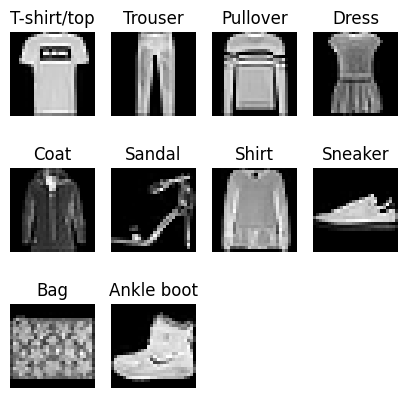

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names
className_images = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
trainingData_length=len(train_labels)
total_class=max(train_labels)+1


#plotting images with its labels
plt.figure(figsize=(5, 5))
for i in range(total_class):
    #subplot - used so that we can have many images in one image
    # 1st row,2nd col, 3rd index of curr
    plt.subplot(3, 4, i + 1)
    sample_array = np.where(train_labels == i)
    label_index=sample_array[0][0]
    plt.imshow(train_images[label_index], cmap='gray')
    plt.title(className_images[i])
    plt.axis('off')
    wandb.log({"Question1": [wandb.Image(train_images[label_index], caption=className_images[i])]})

plt.show()

In [6]:
wandb.finish()

# Question 2

In [3]:
class MultiLayerPerceptronFeed():
    parameters = {}
    gradients = {}

    def __init__(self, train_data, train_labels, layer_sizes):
        self.train_data = train_data
        self.train_labels = train_labels
        self.no_of_samples = len(train_data)
        self.layer_sizes = layer_sizes

        # np.random.seed(120)#will give same random numbers every time
        self.parameters = {}
        # norm = 1e3
        for i in range(len(layer_sizes) - 1):
            #input layer(n) and 1st hidden layer(m) will have weight vector w1->n*m and bias b1->1*m
            #init W to random values
            self.parameters[f'w_{i+1}'] = np.random.randn(layer_sizes[i], layer_sizes[i+1])
            #init B to 0
            self.parameters[f'b_{i+1}'] = np.random.randn(1,layer_sizes[i+1])

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def sigmoid_d(self, x):
        return (self.sigmoid(x)*(1-self.sigmoid(x)))

    def relu_d(self, x):
        return (x > 0) * 1

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def feed_forwards(self, input_data):
        self.layer_outputs = []
        for i in range(len(self.layer_sizes) - 1):
            if(i==0) :#input is our images
                #input_data->1*m,w->m*n,b->1*n
                pre_activation=np.matmul(input_data , self.parameters[f'w_{i+1}']) + self.parameters[f'b_{i+1}']
            else:
                #input data=outpu of last processed layer(layer_outputs[-1])
                pre_activation = np.matmul(self.layer_outputs[-1], self.parameters[f'w_{i+1}']) + self.parameters[f'b_{i+1}']

            if i < len(self.layer_sizes) - 2 :
                activation = self.sigmoid(pre_activation)
            else :
                activation=self.softmax(pre_activation)

            self.layer_outputs.append(activation)
        return self.layer_outputs[-1]
        #print(self.layer_outputs[-1][-1][-1])


In [7]:
#load data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

#change trainlabel=2 to oneHot=[0 0 1 0 0 0 0 0 0 0]
train_labels_one_hot = np.eye(10)[train_labels]
test_labels_one_hot = np.eye(10)[test_labels]

#We can give any number of layers and their sizes here
layer_sizes = [train_images.shape[1],5, 5,5,10]  # Input, hidden1, hidden2,hidden3 output

#init , train and test our model
mlp = MultiLayerPerceptronFeed(train_images, train_labels_one_hot, layer_sizes)
feedForwardOutput=mlp.feed_forwards(train_images)

print("Predicted probabilty after one feed forward call:")
print(feedForwardOutput[10])

print("True label value of Image:")
print(test_labels_one_hot[10])

Predicted probabilty after one feed forward call:
[0.20534711 0.20156243 0.00780863 0.38926712 0.14157198 0.01476344
 0.00048238 0.01227088 0.00589892 0.02102712]
True label value of Image:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Question 3 (MultiLayerPerceptron Class)

In [7]:
class MultiLayerPerceptron():

  def __init__(
        self,
        train_data,
        train_labels,
        val_data,
        val_labels,
        layer_sizes,
        initialization,
        loss_act_func,
        batch_size=4,
        epochs=1,
        learning_rate=0.1,
        weight_decay=0,
        optimizer="sgd",
        momentum=0.5,
        beta=0.5,
        beta1=0.5,
        beta2=0.5,
        epsilon=0.000001,
        printFlag="print"
        ):

      self.parameters = {}
      self.gradients = {}
      self.train_data = train_data
      self.train_labels = train_labels
      self.val_data=val_data
      self.val_labels=val_labels
      self.no_of_samples = len(train_data)
      self.no_of_features = train_data.shape[1] #size of column of train_data
      self.no_of_classes = 10 #size of column of train_labels
      self.layer_sizes = layer_sizes
      self.batch_size=batch_size
      # self.act_func=act_func
      self.epochs=epochs
      self.learning_rate=learning_rate
      self.weight_decay=weight_decay
      self.optimizer=optimizer
      self.loss_act_func=loss_act_func
      self.initialization = initialization
      self.momentum=momentum
      self.beta=beta
      self.beta1=beta1
      self.beta2=beta2
      self.epsilon=epsilon
      self.printFlag=printFlag

      self.A = {}
      self.H = {}

#function to initialize Weights either using random initializer or Xavior
  def init_weights(self):
    if self.initialization=="random":
      # print("init random")
      for i in range(len(self.layer_sizes) - 1):
          #input layer(n) and 1st hidden layer(m) will have weight vector w1->n*m and bias b1->1*m
          #init W to random values
          self.parameters[f'w_{i+1}'] = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1])
          #init B to 0
          self.parameters[f'b_{i+1}'] = np.random.randn(1,self.layer_sizes[i+1])

    if self.initialization=="Xavier":
      print("inint Xavier")
      for i in range(len(self.layer_sizes) - 1):
        x_fact = np.sqrt(6 / (self.layer_sizes[i] + self.layer_sizes[i + 1]))
        self.parameters[f'w_{i+1}'] = np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1]) * x_fact
        self.parameters[f'b_{i+1}'] = np.random.randn(1,self.layer_sizes[i+1]) * x_fact

#softmax fynction
  def softmax(self, x):
    max_x = np.max(x, axis=1, keepdims=True)
    exps = np.exp(x - max_x)
    return exps / np.sum(exps, axis=1, keepdims=True)

#derivation of softmax function
  def softmax_d(self,x):
    softmax_x = self.softmax(x)
    return softmax_x*(1-softmax_x)

#feed forward Function
  def feed_forwards(self, input_data):
    for i in range(len(self.layer_sizes) - 1): # i -> 0-3
        # if(i==0) :#input is our images
        if(i==0):
          preactivation=np.dot(input_data , self.parameters[f'w_{i+1}']) + self.parameters[f'b_{i+1}']
        else:
          preactivation = np.dot(self.H[i], self.parameters[f'w_{i+1}']) + self.parameters[f'b_{i+1}']
        self.A[i+1]=preactivation

        if i < len(self.layer_sizes) - 2 :
            #if we havent reached the last layer
            #give preactivation output of previous layer to the acivation function
            activation = self.loss_act_func.activation_func(self.A[i+1],"real")
        else :
            #if we reached last layer then use softmax as activation
            activation=self.softmax(self.A[i+1])
        self.H[i+1]=activation

    return self.H[len(self.layer_sizes)-1]

#back propogation method
  def back_prop(self, input_data, true_label,pred_label):

    #check which loss function we are using and change dL-dA according to it
    if ((self.loss_act_func).get_name()=="cross_entropy"):
      dL_dA = pred_label - true_label
    elif ((self.loss_act_func).get_name()=="mean_squared_error"):
      dL_dA = ((pred_label - true_label) * self.softmax_d(self.A[len(self.layer_sizes)-1])) / true_label.shape[0]

    #implementing chain rule
    for i in range(len(self.layer_sizes) - 1, 1, -1): # i->4 3 2

        self.gradients[f'w_{i}']=np.dot(self.H[i-1].T, dL_dA)
        self.gradients[f'b_{i}']=np.sum(dL_dA , axis=0,keepdims=True)

        dL_dH=np.dot(dL_dA, (self.parameters[f'w_{i}']).T )
        dL_dA = dL_dH * self.loss_act_func.activation_func(self.A[i-1],"derivative")

    self.gradients[f'w_{1}']=np.dot(input_data.T, dL_dA )
    self.gradients[f'b_{1}']=np.sum(dL_dA , axis=0,keepdims=True)

#All optimizers are implemented here
  def optimizer_func(self):

      if(self.optimizer=="sgd"):
          #Implementing SGD
          for i in range(self.epochs):
              #j loop will go for all the batches created
              for j in range(0,self.no_of_samples,self.batch_size):
                  start = j
                  end = start + self.batch_size
                  Y_train_labels = self.train_labels[start:end]
                  X_train_images = self.train_data[start:end]

                  pred_labels=self.feed_forwards(X_train_images)
                  self.back_prop(X_train_images, Y_train_labels,pred_labels)

                  #update weights and biases
                  for k in range(len(self.layer_sizes) - 1):# 0->3
                      self.gradients[f'w_{k+1}']=self.gradients[f'w_{k+1}']/self.batch_size
                      self.gradients[f'b_{k+1}']=self.gradients[f'b_{k+1}']/self.batch_size

                      self.gradients[f'w_{k+1}'] =(self.gradients[f'w_{k+1}']) + self.weight_decay * self.parameters[f'w_{k+1}']
                      self.parameters[f'w_{k+1}'] -= self.learning_rate * (self.gradients[f'w_{k+1}'] )
                      self.parameters[f'b_{k+1}'] -= self.learning_rate * (self.gradients[f'b_{k+1}'] )

              #finding training/validation loss/accuracy
              pred_labels = self.feed_forwards(self.train_data)
              tra_acc = self.accuracy(pred_labels,self.train_labels)
              tra_loss = self.loss_act_func.loss_functions(pred_labels, self.train_labels)

              pred_labels = self.feed_forwards(self.val_data)
              val_acc = self.accuracy(pred_labels,self.val_labels)
              val_loss = self.loss_act_func.loss_functions(pred_labels, self.val_labels)

              if(self.printFlag=="print"):
                print(f"Epoch {i+1}, Training Loss: {tra_loss} , Training Accuracy: {tra_acc} , Validation Loss: {val_loss} Validation Accuracy: {val_acc}")
              else:
                wandb.log({"Epoch": i+1, "Training_Loss": tra_loss, "Training_Accuracy": tra_acc,"Validation_Loss": val_loss,"Validation_Accuracy": val_acc})

      if(self.optimizer=="momentum"):
        #init velocities for w and b to zeros
        velocities={}
        for i in range(len(self.layer_sizes) - 1):
          velocities[f'w_{i+1}'] = np.zeros((self.layer_sizes[i], self.layer_sizes[i+1]))
          velocities[f'b_{i+1}'] = np.zeros((1, self.layer_sizes[i+1]))

        for i in range(self.epochs):
          for j in range(0,self.no_of_samples,self.batch_size):
            start = j
            end = start + self.batch_size
            Y_train_labels = self.train_labels[start:end]
            X_train_images = self.train_data[start:end]

            pred_labels=self.feed_forwards(X_train_images)
            self.back_prop(X_train_images, Y_train_labels,pred_labels)

            #update weights and bias as per momentum updation rule
            for k in range(len(self.layer_sizes) - 1):
                self.gradients[f'w_{k+1}']=self.gradients[f'w_{k+1}']/self.batch_size
                self.gradients[f'b_{k+1}']=self.gradients[f'b_{k+1}']/self.batch_size

                self.gradients[f'w_{k+1}'] =(self.gradients[f'w_{k+1}']) + self.weight_decay * self.parameters[f'w_{k+1}']
                # Update velocities with momentum
                velocities[f'w_{k+1}'] = self.momentum * velocities[f'w_{k+1}'] + self.learning_rate * (self.gradients[f'w_{k+1}'])
                velocities[f'b_{k+1}'] = self.momentum * velocities[f'b_{k+1}'] + self.learning_rate * (self.gradients[f'b_{k+1}'])

                # Update parameters with momentum
                self.parameters[f'w_{k+1}'] -= velocities[f'w_{k+1}']
                self.parameters[f'b_{k+1}'] -= velocities[f'b_{k+1}']

          #train/validation data loss/accuracy
          pred_labels = self.feed_forwards(self.train_data)
          tra_acc = self.accuracy(pred_labels,self.train_labels)
          tra_loss = self.loss_act_func.loss_functions(pred_labels, self.train_labels)

          pred_labels = self.feed_forwards(self.val_data)
          val_acc = self.accuracy(pred_labels,self.val_labels)
          val_loss = self.loss_act_func.loss_functions(pred_labels, self.val_labels)
          if(self.printFlag=="print"):
            print(f"Epoch {i+1}, Training Loss: {tra_loss} , Training Accuracy: {tra_acc} , Validation Loss: {val_loss} Validation Accuracy: {val_acc}")
          else:
            wandb.log({"Epoch": i+1, "Training_Loss": tra_loss, "Training_Accuracy": tra_acc,"Validation_Loss": val_loss,"Validation_Accuracy": val_acc})

      if(self.optimizer=="nag"):
          # Initialize velocities for weights and biases
          velocities={}
          for i in range(len(self.layer_sizes) - 1):
              velocities[f'w_{i+1}'] = np.zeros((self.layer_sizes[i], self.layer_sizes[i+1]))
              velocities[f'b_{i+1}'] = np.zeros((1, self.layer_sizes[i+1]))

          for i in range(self.epochs):
              for j in range(0,self.no_of_samples,self.batch_size):
                  start = j
                  end = start + self.batch_size
                  Y_train_labels = self.train_labels[start:end]
                  X_train_images = self.train_data[start:end]

                  '''
                  storing old weights in self.parameters[f'w_{k+1}_orig']
                  so that i can use it later and
                  updating self.parameters[f'w_{k+1}'] so that same feed forward function can be used.
                  '''
                  for k in range(len(self.layer_sizes) - 1):
                      self.parameters[f'w_{k+1}_orig']=self.parameters[f'w_{k+1}']
                      self.parameters[f'b_{k+1}_orig']=self.parameters[f'b_{k+1}']

                      self.parameters[f'w_{k+1}'] = self.parameters[f'w_{k+1}'] - self.momentum * velocities[f'w_{k+1}']
                      self.parameters[f'b_{k+1}'] = self.parameters[f'b_{k+1}'] - self.momentum * velocities[f'b_{k+1}']

                  #feed forward and backprop is applied after changing weights and biases
                  pred_labels=self.feed_forwards(X_train_images)
                  self.back_prop(X_train_images, Y_train_labels,pred_labels)

                  '''
                  here 1st we will set original weights to self.parameters[f'w_{k+1}']
                  and then update weigths and biases.
                  '''
                  for k in range(len(self.layer_sizes) - 1):

                      self.gradients[f'w_{k+1}']=self.gradients[f'w_{k+1}']/self.batch_size
                      self.gradients[f'b_{k+1}']=self.gradients[f'b_{k+1}']/self.batch_size

                      self.gradients[f'w_{k+1}'] =(self.gradients[f'w_{k+1}']) + self.weight_decay * self.parameters[f'w_{k+1}']

                      velocities[f'w_{k+1}'] = self.momentum * velocities[f'w_{k+1}'] + self.learning_rate * (self.gradients[f'w_{k+1}'] )
                      velocities[f'b_{k+1}'] = self.momentum * velocities[f'b_{k+1}'] + self.learning_rate * (self.gradients[f'b_{k+1}'] )

                      self.parameters[f'w_{k+1}']=self.parameters[f'w_{k+1}_orig']
                      self.parameters[f'b_{k+1}']=self.parameters[f'b_{k+1}_orig']

                      self.parameters[f'w_{k+1}'] -= velocities[f'w_{k+1}']
                      self.parameters[f'b_{k+1}'] -= velocities[f'b_{k+1}']

              pred_labels = self.feed_forwards(self.train_data)
              tra_acc = self.accuracy(pred_labels,self.train_labels)
              tra_loss = self.loss_act_func.loss_functions(pred_labels, self.train_labels)

              pred_labels = self.feed_forwards(self.val_data)
              val_acc = self.accuracy(pred_labels,self.val_labels)
              val_loss = self.loss_act_func.loss_functions(pred_labels, self.val_labels)
              if(self.printFlag=="print"):
                print(f"Epoch {i+1}, Training Loss: {tra_loss} , Training Accuracy: {tra_acc} , Validation Loss: {val_loss} Validation Accuracy: {val_acc}")
              else:
                wandb.log({"Epoch": i+1, "Training_Loss": tra_loss, "Training_Accuracy": tra_acc,"Validation_Loss": val_loss,"Validation_Accuracy": val_acc})

      if(self.optimizer=="rmsprop"):
        squared_gradients={}
        for i in range(len(self.layer_sizes) - 1):
            squared_gradients[f'w_{i+1}'] = np.zeros((self.layer_sizes[i], self.layer_sizes[i+1]))
            squared_gradients[f'b_{i+1}'] = np.zeros((1, self.layer_sizes[i+1]))

        for i in range(self.epochs):
            for j in range(0,self.no_of_samples,self.batch_size):
                start = j
                end = start + self.batch_size
                Y_train_labels = self.train_labels[start:end]
                X_train_images = self.train_data[start:end]

                pred_labels=self.feed_forwards(X_train_images)
                self.back_prop(X_train_images, Y_train_labels,pred_labels)

                for k in range(len(self.layer_sizes) - 1):

                    self.gradients[f'w_{k+1}']=self.gradients[f'w_{k+1}']/self.batch_size
                    self.gradients[f'b_{k+1}']=self.gradients[f'b_{k+1}']/self.batch_size

                    self.gradients[f'w_{k+1}'] =(self.gradients[f'w_{k+1}']) + self.weight_decay * self.parameters[f'w_{k+1}']

                    # Calculate the squared gradients
                    squared_gradients[f'w_{k+1}'] = self.beta * squared_gradients[f'w_{k+1}'] + (1 - self.beta) * ((self.gradients[f'w_{k+1}']) ** 2)
                    squared_gradients[f'b_{k+1}'] = self.beta * squared_gradients[f'b_{k+1}'] + (1 - self.beta) * ((self.gradients[f'b_{k+1}']) ** 2)

                    # Update parameters using RMSprop
                    self.parameters[f'w_{k+1}'] -= (self.learning_rate * self.gradients[f'w_{k+1}'] / (np.sqrt(squared_gradients[f'w_{k+1}']) + self.epsilon))
                    self.parameters[f'b_{k+1}'] -= (self.learning_rate * self.gradients[f'b_{k+1}'] / (np.sqrt(squared_gradients[f'b_{k+1}']) + self.epsilon))

            pred_labels = self.feed_forwards(self.train_data)
            tra_acc = self.accuracy(pred_labels,self.train_labels)
            tra_loss = self.loss_act_func.loss_functions(pred_labels, self.train_labels)

            pred_labels = self.feed_forwards(self.val_data)
            val_acc = self.accuracy(pred_labels,self.val_labels)
            val_loss = self.loss_act_func.loss_functions(pred_labels, self.val_labels)
            if(self.printFlag=="print"):
              print(f"Epoch {i+1}, Training Loss: {tra_loss} , Training Accuracy: {tra_acc} , Validation Loss: {val_loss} Validation Accuracy: {val_acc}")
            else:
              wandb.log({"Epoch": i+1, "Training_Loss": tra_loss, "Training_Accuracy": tra_acc,"Validation_Loss": val_loss,"Validation_Accuracy": val_acc})

      if(self.optimizer=="adam"):
        moments={}
        for i in range(len(self.layer_sizes) - 1):
            moments[f'm_w_{i+1}'] = np.zeros((self.layer_sizes[i], self.layer_sizes[i+1]))
            moments[f'm_b_{i+1}'] = np.zeros((1, self.layer_sizes[i+1]))

        velocities={}
        for i in range(len(self.layer_sizes) - 1):
            velocities[f'v_w_{i+1}'] = np.zeros((self.layer_sizes[i], self.layer_sizes[i+1]))
            velocities[f'v_b_{i+1}'] = np.zeros((1, self.layer_sizes[i+1]))

        # t=0
        for i in range(self.epochs):
          t=i+1
          for j in range(0,self.no_of_samples,self.batch_size):
              # t=t+1
              start = j
              end = start + self.batch_size
              Y_train_labels = self.train_labels[start:end]
              X_train_images = self.train_data[start:end]

              pred_labels=self.feed_forwards(X_train_images)
              self.back_prop(X_train_images, Y_train_labels,pred_labels)
              # t=1
              for k in range(len(self.layer_sizes) - 1):

                  self.gradients[f'w_{k+1}'] = self.gradients[f'w_{k+1}'] / self.batch_size
                  self.gradients[f'b_{k+1}']=self.gradients[f'b_{k+1}']/self.batch_size

                  self.gradients[f'w_{k+1}'] = self.gradients[f'w_{k+1}'] + self.weight_decay * self.parameters[f'w_{k+1}']

                  # Update moments and velocities with Adam
                  moments[f'm_w_{k+1}'] = self.beta1 * moments[f'm_w_{k+1}'] + (1 - self.beta1) * self.gradients[f'w_{k+1}']
                  moments[f'm_b_{k+1}'] = self.beta1 * moments[f'm_b_{k+1}'] + (1 - self.beta1) * self.gradients[f'b_{k+1}']

                  velocities[f'v_w_{k+1}'] = self.beta2 * velocities[f'v_w_{k+1}'] + (1 - self.beta2) * (self.gradients[f'w_{k+1}'] ** 2)
                  velocities[f'v_b_{k+1}'] = self.beta2 * velocities[f'v_b_{k+1}'] + (1 - self.beta2) * (self.gradients[f'b_{k+1}'] ** 2)

                  # Bias correction
                  m_w_hat = moments[f'm_w_{k+1}'] / (1 - self.beta1 ** t)
                  m_b_hat = moments[f'm_b_{k+1}'] / (1 - self.beta1 ** t)

                  v_w_hat = velocities[f'v_w_{k+1}'] / (1 - self.beta2 ** t)
                  v_b_hat = velocities[f'v_b_{k+1}'] / (1 - self.beta2 ** t)

                  # Update parameters with Adam
                  self.parameters[f'w_{k+1}'] -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
                  self.parameters[f'b_{k+1}'] -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)

                  # t=t+1

          pred_labels = self.feed_forwards(self.train_data)
          tra_acc = self.accuracy(pred_labels,self.train_labels)
          tra_loss = self.loss_act_func.loss_functions(pred_labels, self.train_labels)

          pred_labels = self.feed_forwards(self.val_data)
          val_acc = self.accuracy(pred_labels,self.val_labels)
          val_loss = self.loss_act_func.loss_functions(pred_labels, self.val_labels)
          if(self.printFlag=="print"):
            print(f"Epoch {i+1}, Training Loss: {tra_loss} , Training Accuracy: {tra_acc} , Validation Loss: {val_loss} Validation Accuracy: {val_acc}")
          else:
            wandb.log({"Epoch": i+1, "Training_Loss": tra_loss, "Training_Accuracy": tra_acc,"Validation_Loss": val_loss,"Validation_Accuracy": val_acc})

      if(self.optimizer=="nadam"):
        moments={}
        for i in range(len(self.layer_sizes) - 1):
            moments[f'm_w_{i+1}'] = np.zeros((self.layer_sizes[i], self.layer_sizes[i+1]))
            moments[f'm_b_{i+1}'] = np.zeros((1, self.layer_sizes[i+1]))

        velocities={}
        for i in range(len(self.layer_sizes) - 1):
            velocities[f'v_w_{i+1}'] = np.zeros((self.layer_sizes[i], self.layer_sizes[i+1]))
            velocities[f'v_b_{i+1}'] = np.zeros((1, self.layer_sizes[i+1]))

        # t=0
        for i in range(self.epochs):
          t=1+i
          for j in range(0,self.no_of_samples,self.batch_size):
            # t=t+1
            start = j
            end = start + self.batch_size
            Y_train_labels = self.train_labels[start:end]
            X_train_images = self.train_data[start:end]

            pred_labels=self.feed_forwards(X_train_images)
            self.back_prop(X_train_images, Y_train_labels,pred_labels)

            for k in range(len(self.layer_sizes) - 1):

                self.gradients[f'w_{k+1}'] = self.gradients[f'w_{k+1}'] / self.batch_size
                self.gradients[f'b_{k+1}']=self.gradients[f'b_{k+1}']/self.batch_size

                self.gradients[f'w_{k+1}'] = self.gradients[f'w_{k+1}'] + self.weight_decay * self.parameters[f'w_{k+1}']

                # Update moments and velocities with Adam
                moments[f'm_w_{k+1}'] = self.beta1 * moments[f'm_w_{k+1}'] + (1 - self.beta1) * self.gradients[f'w_{k+1}']
                moments[f'm_b_{k+1}'] = self.beta1 * moments[f'm_b_{k+1}'] + (1 - self.beta1) * self.gradients[f'b_{k+1}']

                velocities[f'v_w_{k+1}'] = self.beta2 * velocities[f'v_w_{k+1}'] + (1 - self.beta2) * (self.gradients[f'w_{k+1}'] ** 2)
                velocities[f'v_b_{k+1}'] = self.beta2 * velocities[f'v_b_{k+1}'] + (1 - self.beta2) * (self.gradients[f'b_{k+1}'] ** 2)

                # Bias correction
                m_w_hat = moments[f'm_w_{k+1}'] / (1 - self.beta1 ** t)
                m_b_hat = moments[f'm_b_{k+1}'] / (1 - self.beta1 ** t)

                v_w_hat = velocities[f'v_w_{k+1}'] / (1 - self.beta2 ** t)
                v_b_hat = velocities[f'v_b_{k+1}'] / (1 - self.beta2 ** t)

                # Update parameters with NAdam
                nadam_factor = (1 - self.beta1) / (1 - (self.beta1 ** t))
                weigth_update = nadam_factor * self.gradients[f'w_{k+1}'] + (self.beta1 * m_w_hat)
                bias_update = nadam_factor * self.gradients[f'b_{k+1}'] + (self.beta1 * m_b_hat)
                self.parameters[f'w_{k+1}'] -= ((self.learning_rate / (np.sqrt(v_w_hat) + self.epsilon)) * weigth_update )
                self.parameters[f'b_{k+1}'] -= ((self.learning_rate / (np.sqrt(v_b_hat) + self.epsilon)) * bias_update )

            # t=t+1

          pred_labels = self.feed_forwards(self.train_data)
          tra_acc = self.accuracy(pred_labels,self.train_labels)
          tra_loss = self.loss_act_func.loss_functions(pred_labels, self.train_labels)

          pred_labels = self.feed_forwards(self.val_data)
          val_acc = self.accuracy(pred_labels,self.val_labels)
          val_loss = self.loss_act_func.loss_functions(pred_labels, self.val_labels)
          if(self.printFlag=="print"):
            print(f"Epoch {i+1}, Training Loss: {tra_loss} , Training Accuracy: {tra_acc} , Validation Loss: {val_loss} Validation Accuracy: {val_acc}")
          else:
            wandb.log({"Epoch": i+1, "Training_Loss": tra_loss, "Training_Accuracy": tra_acc,"Validation_Loss": val_loss,"Validation_Accuracy": val_acc})

#calculates the accuracy
  def accuracy(self, pred, truth):
    return ((np.argmax(truth, axis=1) == np.argmax(pred, axis=1)).mean())*100

# calculated loss and accuracy for test data
  def test(self, x, y):
    pred_labels=self.feed_forwards(x)
    loss = self.loss_act_func.loss_functions(pred_labels, y)
    acc = self.accuracy(pred_labels, y)
    print(f'TEST LOSS: {loss:.4f} TEST ACCURACY: {acc:.4f}')


# loss and activation

In [8]:
class LossActFunc():
    #this class has methods for loss and activation functions
    def __init__(self, lossFun = "cross_entropy",actFun="sigmoid"):
        self.loss_func = lossFun
        self.act_fun = actFun

    #contains both the loss functions
    def loss_functions(self,pred, actual):
      if (self.loss_func=="cross_entropy"):
        return -np.sum(actual * np.log(pred + 1e-9)) / len(pred)

      elif (self.loss_func == "mean_squared_error"):
        squErr=(1/2)* np.sum((pred - actual) ** 2)
        meanSquErr=squErr/ len(pred)
        return  meanSquErr

    #this  methid returns the name of the loss function called
    def get_name(self):
      if (self.loss_func=="cross_entropy"):
        return "cross_entropy"

      elif (self.loss_func == "mean_squared_error"):
        return "mean_squared_error"

    #contains the activation functions and their derivatives
    def activation_func(self, x,real_der):
      #real_der=real --> want activation function
      #real_der=der --> want derivation of activation function
      if(self.act_fun == "sigmoid"):
        # sigmoid function
        if(real_der=="real"):
            return 1.0 / (1.0 + np.exp(-x))
        else:
           sigmoid_x = self.activation_func(x,"real")
           return sigmoid_x * (1 - sigmoid_x)
           

      if(self.act_fun == "tanh"):
        # tanh function
        if(real_der=="real"):
            return np.tanh(x)
        else:
           return 1 - (np.tanh(x) ** 2)
           

      if(self.act_fun == "ReLU"):
        if(real_der=="real"):
            return np.maximum(0, x)
        else:
            return (x > 0) * 1           
        
      if(self.act_fun == "identity"):
        if(real_der=="real"):
            return x
        else:
            return 1           



# Load & Preprocess

In [9]:
#Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
total_class=max(train_labels)

train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

#change trainlabel=2 to oneHot=[0 0 1 0 0 0 0 0 0 0]
train_labels_one_hot = np.eye(10)[train_labels]
test_labels_one_hot = np.eye(10)[test_labels]

train_images, val_images, train_labels_one_hot, val_labels_one_hot = train_test_split(train_images, train_labels_one_hot, test_size=0.1, random_state=42)



# Set param and call

In [11]:

no_hidden_layers=5
hidden_layer_size=256

layer_sizes=[]
layer_sizes.append(train_images.shape[1])
for i in range(no_hidden_layers):
    layer_sizes.append(hidden_layer_size)
layer_sizes.append(10)

print("layer_sizes=",layer_sizes)

loss_act_func = LossActFunc("cross_entropy","tanh") #"mean_squared_error", "cross_entropy" # sigmoid, ReLU, tanh ,identity
# loss_func = LossFunc("cross_entropy")
epochs=2
initialization="Xavier" #random , Xavier
learning_rate=0.0005
momentum=0.9  #for momentum and nag
beta=0.5     #for rmsprop
beta1=0.9    #for adam and nadam
beta2=0.999    #for adam and nadam
epsilon=1e-8
weight_decay=0.0005
batch_size=128
optimizer="nadam" # sgd , momentum ,nag , rmsprop , adam , nadam
printFlag="print" # if you want to log to wandb trhen set it to : "wandb"

mlp = MultiLayerPerceptron(train_images, train_labels_one_hot,val_images,val_labels_one_hot, layer_sizes,initialization,loss_act_func,batch_size,epochs,learning_rate,weight_decay,optimizer,momentum,beta,beta1,beta2,epsilon,printFlag)
mlp.init_weights()
mlp.optimizer_func()
mlp.test(test_images, test_labels_one_hot)

layer_sizes= [784, 256, 256, 256, 256, 256, 10]
inint Xavier
Epoch 1, Training Loss: 0.3332927367213965 , Training Accuracy: 87.9462962962963 , Validation Loss: 0.3643093150171964 Validation Accuracy: 86.83333333333333
Epoch 2, Training Loss: 0.2901292333847133 , Training Accuracy: 89.30925925925925 , Validation Loss: 0.3348420667957855 Validation Accuracy: 87.61666666666666
TEST LOSS: 0.3569 TEST ACCURACY: 87.2100


# Question4 sweep

In [10]:
sweep_config = {
    # Random Search for hyperparameters
    "name" : "Random_sweep",
    "method": "random",
    "metric": {"goal": "maximize", "name": "validationaccuracy"},
    "parameters": {
        "activation": {"values": ["sigmoid", "tanh", "ReLU"]},
        "batch_size": {"values": [16,32, 64]},
        "optimizer": {"values": ["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"]},
        "no_of_hidden_layer": {"values": [3,4,5]},
        "size_of_hidden_layerr": {"values": [128,64,32,256]},
        "epochs": {"values": [5, 10]},
        "weight_decay": {"values": [0.0, 0.0005,0.5]},
        "learning_rate": {"values": [1e-3, 1e-4]},
        "initialization": {"values": ["Xavier", "random"]}
    }
}

In [11]:
def train():
   init_sweep =  wandb.init(project="CS6910 - Assignment 1", name="Question4")
   sweep_params = init_sweep.config

   wandb.run.name = "_ac_" + sweep_params.activation + "_bs_" + str(sweep_params.batch_size) + "_op_" + sweep_params.optimizer + "_hl_" + str(sweep_params.no_of_hidden_layer)+ "_neu_" + str(sweep_params.size_of_hidden_layerr) +"_ep_" + str(sweep_params.epochs)+"_wd_" + str(sweep_params.weight_decay)+"_lr_" + str(sweep_params.learning_rate)+"_ini_"+sweep_params.initialization

   loss_act_func = LossActFunc("cross_entropy",sweep_params.activation)
   epochs=sweep_params.epochs
   initialization=sweep_params.initialization #random , Xavier
   learning_rate=sweep_params.learning_rate
   momentum=0.9  #for momentum and nag
   beta=0.9     #for rmsprop
   beta1=0.9    #for adam and nadam
   beta2=0.999    #for adam and nadam
   epsilon=0.000001
   weight_decay=sweep_params.weight_decay
   batch_size=sweep_params.batch_size
   optimizer=sweep_params.optimizer # sgd , momentum ,nag , rmsprop , adam , nadam
   printFlag="wandb"

   # layer_sizes = [train_images.shape[1],5,10,15,10]
   layer_sizes=[]
   layer_sizes.append(train_images.shape[1])
   for i in range(sweep_params.no_of_hidden_layer):
      layer_sizes.append(sweep_params.size_of_hidden_layerr)
   layer_sizes.append(10)

   print("layer_sizes=",layer_sizes)

   mlp = MultiLayerPerceptron(train_images, train_labels_one_hot,val_images,val_labels_one_hot, layer_sizes,initialization,loss_act_func,batch_size,epochs,learning_rate,weight_decay,optimizer,momentum,beta,beta1,beta2,epsilon,printFlag)
   mlp.init_weights()
   mlp.optimizer_func()
   y_pred = mlp.feed_forwards(val_images)

   val_accuracy=mlp.accuracy(y_pred,val_labels_one_hot)
   wandb.log({"validationaccuracy": val_accuracy})


In [12]:
sweep_id = wandb.sweep(sweep_config, project="CS6910 - Assignment 1")
wandb.agent(sweep_id, train, count=100)
wandb.finish()

Create sweep with ID: ybdu0m2b
Sweep URL: https://wandb.ai/cs23m032/CS6910%20-%20Assignment%201/sweeps/ybdu0m2b


wandb: Agent Starting Run: jvo7vat5 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0001
wandb: 	no_of_hidden_layer: 4
wandb: 	optimizer: adam
wandb: 	size_of_hidden_layerr: 32
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


layer_sizes= [784, 32, 32, 32, 32, 10]


Epoch,▁▃▅▆█
Training_Accuracy,▁▃▅▇█
Training_Loss,█▆▄▂▁
Validation_Accuracy,▁▃▅▇█
Validation_Loss,█▆▄▂▁
validationaccuracy,▁
Epoch,5
Training_Accuracy,37.77593
Training_Loss,12.70247
Validation_Accuracy,36.63333
Validation_Loss,12.94169


wandb: Agent Starting Run: pkrkmiup with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0001
wandb: 	no_of_hidden_layer: 4
wandb: 	optimizer: momentum
wandb: 	size_of_hidden_layerr: 256
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


layer_sizes= [784, 256, 256, 256, 256, 10]


Epoch,▁▃▅▆█
Training_Accuracy,▁▄▆▇█
Training_Loss,█▄▃▂▁
Validation_Accuracy,▁▄▆▇█
Validation_Loss,█▄▃▂▁
validationaccuracy,▁
Epoch,5
Training_Accuracy,48.64444
Training_Loss,1.77821
Validation_Accuracy,48.55
Validation_Loss,1.7691


wandb: Agent Starting Run: yxyk82jp with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0001
wandb: 	no_of_hidden_layer: 4
wandb: 	optimizer: momentum
wandb: 	size_of_hidden_layerr: 128
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


layer_sizes= [784, 128, 128, 128, 128, 10]


Epoch,▁▃▅▆█
Training_Accuracy,▁▅▇██
Training_Loss,█▅▃▂▁
Validation_Accuracy,▁▅▇██
Validation_Loss,█▅▃▂▁
validationaccuracy,▁
Epoch,5
Training_Accuracy,18.49259
Training_Loss,2.10671
Validation_Accuracy,17.26667
Validation_Loss,2.12549


wandb: Agent Starting Run: qfxvjvxa with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initialization: random
wandb: 	learning_rate: 0.001
wandb: 	no_of_hidden_layer: 4
wandb: 	optimizer: rmsprop
wandb: 	size_of_hidden_layerr: 128
wandb: 	weight_decay: 0.5
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


layer_sizes= [784, 128, 128, 128, 128, 10]


Epoch,▁▂▃▃▄▅▆▆▇█
Training_Accuracy,█▁▁▁▁▁▁▁▁▁
Training_Loss,▁█████████
Validation_Accuracy,█▁▁▁▁▁▁▁▁▁
Validation_Loss,▁█████████
validationaccuracy,▁
Epoch,10
Training_Accuracy,9.98519
Training_Loss,2.30677
Validation_Accuracy,10.13333
Validation_Loss,2.30705


wandb: Agent Starting Run: o26qgvv0 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	no_of_hidden_layer: 5
wandb: 	optimizer: sgd
wandb: 	size_of_hidden_layerr: 64
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


layer_sizes= [784, 64, 64, 64, 64, 64, 10]
inint Xavier


Epoch,▁▃▅▆█
Training_Accuracy,▁▄▆▇█
Training_Loss,█▅▃▂▁
Validation_Accuracy,▁▄▆▇█
Validation_Loss,█▅▃▂▁
validationaccuracy,▁
Epoch,5
Training_Accuracy,82.05556
Training_Loss,0.51118
Validation_Accuracy,80.93333
Validation_Loss,0.52387


wandb: Agent Starting Run: 8z894gty with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	no_of_hidden_layer: 5
wandb: 	optimizer: nadam
wandb: 	size_of_hidden_layerr: 32
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


layer_sizes= [784, 32, 32, 32, 32, 32, 10]
inint Xavier


Epoch,▁▂▃▃▄▅▆▆▇█
Training_Accuracy,▁▃▄▅▆▆▇▇██
Training_Loss,█▆▅▄▃▃▂▂▁▁
Validation_Accuracy,▁▃▄▆▆▇▇▇██
Validation_Loss,█▅▄▃▂▂▂▁▁▁
validationaccuracy,▁
Epoch,10
Training_Accuracy,89.65926
Training_Loss,0.28441
Validation_Accuracy,87.03333
Validation_Loss,0.357


wandb: Agent Starting Run: e6cwyluh with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	initialization: random
wandb: 	learning_rate: 0.001
wandb: 	no_of_hidden_layer: 3
wandb: 	optimizer: rmsprop
wandb: 	size_of_hidden_layerr: 256
wandb: 	weight_decay: 0.5
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


layer_sizes= [784, 256, 256, 256, 10]


Epoch,▁▅█
Training_Accuracy,█▅▁
Training_Loss,▁▆█
Validation_Accuracy,█▅▁
Validation_Loss,▁▆█
Epoch,3
Training_Accuracy,9.98519
Training_Loss,2.31286
Validation_Accuracy,10.13333
Validation_Loss,2.31366


# Q4_bayesian_sweep

In [ ]:
sweep_config = {
    # Bayesian Search for hyperparameters
    "name" : "Bayesian Sweep",
    "method": "bayes",
    "metric": {"goal": "maximize", "name": "validationaccuracy"},
    "parameters": {
        "activation": {"values": ["sigmoid", "tanh", "ReLU"]},
        "batch_size": {"values": [16,32, 64]},
        "optimizer": {"values": ["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"]},
        "no_of_hidden_layer": {"values": [3,4,5]},
        "size_of_hidden_layerr": {"values": [128,64,32,256]},
        "epochs": {"values": [5, 10]},
        "weight_decay": {"values": [0.0, 0.0005,0.5]},
        "learning_rate": {"values": [1e-3, 1e-4]},
        "initialization": {"values": ["Xavier", "random"]}
    }
}

In [ ]:
def train():
   init_sweep =  wandb.init(project="CS6910 - Assignment 1", name="Question4_bayes")
   sweep_params = init_sweep.config

   wandb.run.name = "_ac_" + sweep_params.activation + "_bs_" + str(sweep_params.batch_size) + "_op_" + sweep_params.optimizer +"_hl_" + str(sweep_params.no_of_hidden_layer)+ "_neu_" + str(sweep_params.size_of_hidden_layerr) +"_ep_" + str(sweep_params.epochs)+"_wd_" + str(sweep_params.weight_decay)+"_lr_" + str(sweep_params.learning_rate)+"_ini_"+sweep_params.initialization

   loss_act_func = LossActFunc("cross_entropy",sweep_params.activation)
    # sigmoid, ReLU, tanh ,identity
    #"mean_squared_error", "cross_entropy"
   epochs=sweep_params.epochs
   initialization=sweep_params.initialization #random , Xavier
   learning_rate=sweep_params.learning_rate
   momentum=0.9  #for momentum and nag
   beta=0.9     #for rmsprop
   beta1=0.9    #for adam and nadam
   beta2=0.999    #for adam and nadam
   epsilon=0.000001
   weight_decay=sweep_params.weight_decay
   batch_size=sweep_params.batch_size
   optimizer=sweep_params.optimizer # sgd , momentum ,nag , rmsprop , adam , nadam   

   # layer_sizes = [train_images.shape[1],5,10,15,10]
   layer_sizes=[]
   layer_sizes.append(train_images.shape[1])
   for i in range(sweep_params.no_of_hidden_layer):
      layer_sizes.append(sweep_params.size_of_hidden_layerr)
   layer_sizes.append(10)

   print("layer_sizes=",layer_sizes)
   printFlag="wandb"
   mlp = MultiLayerPerceptron(train_images, train_labels_one_hot,val_images,val_labels_one_hot, layer_sizes,initialization,loss_act_func,batch_size,epochs,learning_rate,weight_decay,optimizer,momentum,beta,beta1,beta2,epsilon,printFlag)
   mlp.init_weights()
   mlp.optimizer_func()
   y_pred = mlp.feed_forwards(val_images)

   val_accuracy=mlp.accuracy(y_pred,val_labels_one_hot)
   wandb.log({"validationaccuracy": val_accuracy})


In [ ]:
sweep_id = wandb.sweep(sweep_config, project="CS6910 - Assignment 1")
wandb.agent(sweep_id, train, count=100)
wandb.finish()

# Question7

In [12]:

#set best params
# layer_sizes = [train_images.shape[1],256,256,256,128,128,10]  # Input, hidden1, hidden2,hidden3 output

no_hidden_layers=4
hidden_layer_size=256

layer_sizes=[]
layer_sizes.append(train_images.shape[1])
for i in range(no_hidden_layers):
    layer_sizes.append(hidden_layer_size)
layer_sizes.append(10)

print("layer_sizes=",layer_sizes)

loss_act_func = LossActFunc("cross_entropy","ReLU") # sigmoid, ReLU, tanh ,identity
# loss_func = LossFunc("cross_entropy") #"mean_squared_error", "cross_entropy"
epochs=10
initialization="Xavier" #random , Xavier
learning_rate=0.001
momentum=0.9  #for momentum and nag
beta=0.5     #for rmsprop
beta1=0.9    #for adam and nadam
beta2=0.999    #for adam and nadam
epsilon=1e-8
weight_decay=0.0005
batch_size=32
optimizer="nadam" # sgd , momentum ,nag , rmsprop , adam , nadam

printFlag="print"
mlp = MultiLayerPerceptron(train_images, train_labels_one_hot,val_images,val_labels_one_hot, layer_sizes,initialization,loss_act_func,batch_size,epochs,learning_rate,weight_decay,optimizer,momentum,beta,beta1,beta2,epsilon,printFlag)
mlp.init_weights()
mlp.optimizer_func()
mlp.test(test_images, test_labels_one_hot)

layer_sizes= [784, 256, 256, 256, 256, 10]
inint Xavier
Epoch 1, Training Loss: 0.3448078268933393 , Training Accuracy: 87.46666666666667 , Validation Loss: 0.3697558910452753 Validation Accuracy: 86.48333333333333
Epoch 2, Training Loss: 0.31393492784344995 , Training Accuracy: 88.48888888888888 , Validation Loss: 0.35095701208135793 Validation Accuracy: 87.11666666666666
Epoch 3, Training Loss: 0.2852698069115193 , Training Accuracy: 89.45925925925926 , Validation Loss: 0.3330529724065472 Validation Accuracy: 87.76666666666667
Epoch 4, Training Loss: 0.26964106896211415 , Training Accuracy: 89.91666666666667 , Validation Loss: 0.32631131497879357 Validation Accuracy: 88.28333333333333
Epoch 5, Training Loss: 0.25596636037095827 , Training Accuracy: 90.49259259259259 , Validation Loss: 0.3225979526191998 Validation Accuracy: 88.55
Epoch 6, Training Loss: 0.24299166650933912 , Training Accuracy: 90.97407407407407 , Validation Loss: 0.31727248354786053 Validation Accuracy: 88.6166666666

wandb: Currently logged in as: cs23m032. Use `wandb login --relogin` to force relogin


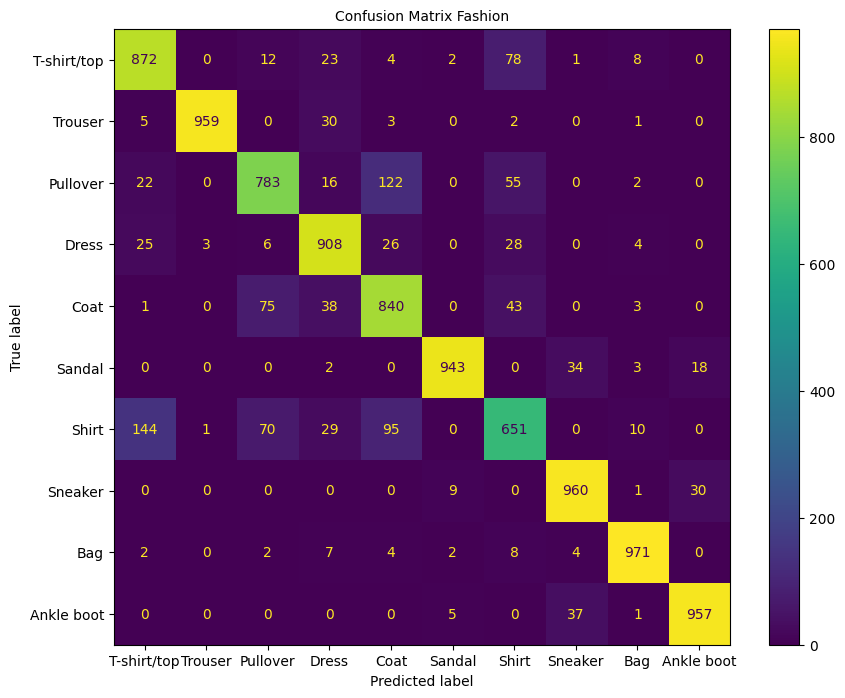

In [14]:
className_images = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

pred_class = mlp.feed_forwards(test_images)

wandb.init(project="CS6910 - Assignment 1", name="Question7_confusion")

mat_predicted=[]
mat_true=[]
for i in range(len(pred_class)):
  mat_predicted.append(np.argmax(pred_class[i]))
for i in range(len(pred_class)):
  mat_true.append(np.argmax(test_labels_one_hot[i]))

fig, ax = plt.subplots(figsize=(10, 8))
confusion_matrix = metrics.confusion_matrix(mat_true , mat_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = className_images)
plt.title('Confusion Matrix Fashion', fontsize=10)
cm_display.plot(ax=ax)
# plt.show()

wandb.log({"Confusion_Matrix": wandb.Image(plt)})
wandb.finish()

In [ ]:
wandb.finish()

# Question 8


In [ ]:
sweep_config = {
    # RandomSearch over the hyperparameters
    "name" : "Question 8",
    "method": "random",
    "metric": {"goal": "maximize", "name": "validationaccuracy"},
    "parameters": {
        "loss_fun":{"values": ["cross_entropy","mean_squared_error"]}
    }
}

def train():
    init_sweep =  wandb.init(project="CS6910 - Assignment 1", name="Question8")
    sweep_params = init_sweep.config

    wandb.run.name = "Loss_function" + sweep_params.loss_fun

    activation="tanh"
    loss=sweep_params.loss_fun
    loss_act_func_square = LossActFunc(loss,activation)
    no_hidden_layers=3
    hidden_layer_size=128

    layer_sizes=[]
    layer_sizes.append(train_images.shape[1])
    for i in range(no_hidden_layers):
        layer_sizes.append(hidden_layer_size)
    layer_sizes.append(10)

    print("layer_sizes=",layer_sizes)

    # loss_func = LossFunc("cross_entropy") #"mean_squared_error", "cross_entropy"
    epochs=10
    initialization="Xavier" #random , Xavier
    learning_rate=0.0001
    momentum=0.9  #for momentum and nag
    beta=0.5     #for rmsprop
    beta1=0.9    #for adam and nadam
    beta2=0.999    #for adam and nadam
    epsilon=1e-8
    weight_decay=0.0005
    batch_size=32
    optimizer="adam" # sgd , momentum ,nag , rmsprop , adam , nadam
    printFlag="wandb"

    mlp_cross = MultiLayerPerceptron(train_images, train_labels_one_hot,val_images,val_labels_one_hot, layer_sizes,initialization,loss_act_func,batch_size,epochs,learning_rate,weight_decay,optimizer,momentum,beta,beta1,beta2,epsilon,printFlag)
    mlp_cross.init_weights()
    mlp_cross.optimizer_func()
    mlp_cross.test(test_images, test_labels_one_hot)

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="CS6910 - Assignment 1")
wandb.agent(sweep_id, train, count=10)
wandb.finish()

# Question 10

In [ ]:
Test_losses=[]
Test_Acuracy=[]
Config_name=["config1","config2","config3"]

In [ ]:
pip install plotly

   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB 640.0 kB/s eta 0:00:25
   ---------------------------------------- 0.1/15.7 MB 465.5 kB/s eta 0:00:34
   ---------------------------------------- 0.1/15.7 MB 652.2 kB/s eta 0:00:24
   ---------------------------------------- 0.2/15.7 MB 702.7 kB/s eta 0:00:23
   ---------------------------------------- 0.2/15.7 MB 737.3 kB/s eta 0:00:22
    --------------------------------------- 0.2/15.7 MB 762.6 kB/s eta 0:00:21
    --------------------------------------- 0.3/15.7 MB 809.2 kB/s eta 0:00:20
    --------------------------------------- 0.3/15.7 MB 838.1 kB/s eta 0:00:19
    --------------------------------------- 0.4/15.7 MB 865.0 kB/s eta 0:00:18
   - -------------------------------------- 0.4/15.7 MB 802.3 kB/s eta 0:00:20


In [ ]:
import plotly.graph_objects as go

In [ ]:
#Load mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
total_class=max(train_labels)

train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

#change trainlabel=2 to oneHot=[0 0 1 0 0 0 0 0 0 0]
train_labels_one_hot = np.eye(10)[train_labels]
test_labels_one_hot = np.eye(10)[test_labels]


train_images, val_images, train_labels_one_hot, val_labels_one_hot = train_test_split(train_images, train_labels_one_hot, test_size=0.1, random_state=42)


In [ ]:
#Configuration 1

no_hidden_layers=4
hidden_layer_size=256

layer_sizes=[]
layer_sizes.append(train_images.shape[1])
for i in range(no_hidden_layers):
    layer_sizes.append(hidden_layer_size)
layer_sizes.append(10)


loss_act_func = LossActFunc("cross_entropy","ReLU") # sigmoid, ReLU, tanh ,identity
epochs=10
initialization="Xavier" #random , Xavier
learning_rate=0.001
momentum=0.9  #for momentum and nag
beta=0.5     #for rmsprop
beta1=0.9    #for adam and nadam
beta2=0.999    #for adam and nadam
epsilon=1e-8
weight_decay=0.0005
batch_size=32
optimizer="nadam"
printFlag="print"

#make object of MultiLayerPerceptron and call optimizer function
mlp = MultiLayerPerceptron(train_images, train_labels_one_hot,val_images,val_labels_one_hot, layer_sizes,initialization,loss_act_func,batch_size,epochs,learning_rate,weight_decay,optimizer,momentum,beta,beta1,beta2,epsilon,printFlag)
mlp.init_weights()
mlp.optimizer_func()

#Find accuracy for Test data and append the result in Test_accuracy list
pred_labels = mlp.feed_forwards(test_images)
test_acc = mlp.accuracy(pred_labels,test_labels_one_hot)
test_loss = mlp.loss_act_func.loss_functions(pred_labels, test_labels_one_hot)
print(test_loss)
print(test_acc)
Test_losses.append(test_loss)
Test_Acuracy.append(test_acc)


inint Xavier
Epoch 1, Training Loss: 0.09509645596194392 , Training Accuracy: 97.24814814814815 , Validation Loss: 0.12254791730618145 Validation Accuracy: 96.3
Epoch 2, Training Loss: 0.06535030954607594 , Training Accuracy: 98.0425925925926 , Validation Loss: 0.10295487731233668 Validation Accuracy: 96.86666666666667
Epoch 3, Training Loss: 0.051415180605237185 , Training Accuracy: 98.45 , Validation Loss: 0.09497121359288942 Validation Accuracy: 97.16666666666667
Epoch 4, Training Loss: 0.04084168505235606 , Training Accuracy: 98.72407407407408 , Validation Loss: 0.08807824350370845 Validation Accuracy: 97.36666666666667
Epoch 5, Training Loss: 0.03378115585565662 , Training Accuracy: 98.94074074074074 , Validation Loss: 0.08548119811932021 Validation Accuracy: 97.6
Epoch 6, Training Loss: 0.023336133927649955 , Training Accuracy: 99.3037037037037 , Validation Loss: 0.07571871035267946 Validation Accuracy: 97.88333333333334
Epoch 7, Training Loss: 0.019140807889430858 , Training Acc

In [ ]:
#Configuration 2

no_hidden_layers=5
hidden_layer_size=256

layer_sizes=[]
layer_sizes.append(train_images.shape[1])
for i in range(no_hidden_layers):
    layer_sizes.append(hidden_layer_size)
layer_sizes.append(10)


loss_act_func = LossActFunc("cross_entropy","tanh") # sigmoid, ReLU, tanh
# loss_func = LossFunc("cross_entropy") #"mean_squared_error", "cross_entropy"
epochs=10
initialization="Xavier" #random , Xavier
learning_rate=0.001
momentum=0.9  #for momentum and nag
beta=0.5     #for rmsprop
beta1=0.9    #for adam and nadam
beta2=0.999    #for adam and nadam
epsilon=1e-8
weight_decay=0.0005
batch_size=32
optimizer="adam"
printFlag="print"

mlp = MultiLayerPerceptron(train_images, train_labels_one_hot,val_images,val_labels_one_hot, layer_sizes,initialization,loss_act_func,batch_size,epochs,learning_rate,weight_decay,optimizer,momentum,beta,beta1,beta2,epsilon,printFlag)
mlp.init_weights()
mlp.optimizer_func()


pred_labels = mlp.feed_forwards(test_images)
test_acc = mlp.accuracy(pred_labels,test_labels_one_hot)
test_loss = mlp.loss_act_func.loss_functions(pred_labels, test_labels_one_hot)
print(test_loss)
print(test_acc)
Test_losses.append(test_loss)
Test_Acuracy.append(test_acc)

inint Xavier
Epoch 1, Training Loss: 0.10011260928746327 , Training Accuracy: 97.01111111111112 , Validation Loss: 0.13291222175912243 Validation Accuracy: 96.06666666666666
Epoch 2, Training Loss: 0.06862968344438934 , Training Accuracy: 97.94074074074074 , Validation Loss: 0.10989846624971893 Validation Accuracy: 96.61666666666666
Epoch 3, Training Loss: 0.059868247958899674 , Training Accuracy: 98.07222222222222 , Validation Loss: 0.10328090345661117 Validation Accuracy: 96.81666666666666
Epoch 4, Training Loss: 0.05666057498821276 , Training Accuracy: 98.17777777777778 , Validation Loss: 0.10242990030489231 Validation Accuracy: 96.86666666666667
Epoch 5, Training Loss: 0.05154632873571092 , Training Accuracy: 98.33518518518518 , Validation Loss: 0.09883162742748153 Validation Accuracy: 96.98333333333333
Epoch 6, Training Loss: 0.04819708847509852 , Training Accuracy: 98.48333333333333 , Validation Loss: 0.09616045609208569 Validation Accuracy: 97.13333333333334
Epoch 7, Training Lo

In [ ]:
#Configuration 3

no_hidden_layers=4
hidden_layer_size=512

layer_sizes=[]
layer_sizes.append(train_images.shape[1])
for i in range(no_hidden_layers):
    layer_sizes.append(hidden_layer_size)
layer_sizes.append(10)


loss_act_func = LossActFunc("cross_entropy","ReLU") # sigmoid, ReLU, tanh
epochs=10
initialization="Xavier" #random , Xavier
learning_rate=0.001
momentum=0.9  #for momentum and nag
beta=0.5     #for rmsprop
beta1=0.9    #for adam and nadam
beta2=0.999    #for adam and nadam
epsilon=1e-8
weight_decay=0.0005
batch_size=32
optimizer="adam"
printFlag="print"

mlp = MultiLayerPerceptron(train_images, train_labels_one_hot,val_images,val_labels_one_hot, layer_sizes,initialization,loss_act_func,batch_size,epochs,learning_rate,weight_decay,optimizer,momentum,beta,beta1,beta2,epsilon,printFlag)
mlp.init_weights()
mlp.optimizer_func()

pred_labels = mlp.feed_forwards(test_images)
test_acc = mlp.accuracy(pred_labels,test_labels_one_hot)
test_loss = mlp.loss_act_func.loss_functions(pred_labels, test_labels_one_hot)
print(test_loss)
print(test_acc)
Test_losses.append(test_loss)
Test_Acuracy.append(test_acc)


inint Xavier
Epoch 1, Training Loss: 0.08714121774890239 , Training Accuracy: 97.38703703703703 , Validation Loss: 0.11053959547859805 Validation Accuracy: 96.83333333333334
Epoch 2, Training Loss: 0.0603568614102387 , Training Accuracy: 98.12592592592593 , Validation Loss: 0.09656645414883258 Validation Accuracy: 97.18333333333334
Epoch 3, Training Loss: 0.046366061721185375 , Training Accuracy: 98.52592592592593 , Validation Loss: 0.09058370226683023 Validation Accuracy: 97.38333333333333
Epoch 4, Training Loss: 0.03600374866678071 , Training Accuracy: 98.8537037037037 , Validation Loss: 0.08228509422614545 Validation Accuracy: 97.61666666666666
Epoch 5, Training Loss: 0.0342737242508912 , Training Accuracy: 98.86111111111111 , Validation Loss: 0.08954031679457752 Validation Accuracy: 97.35000000000001
Epoch 6, Training Loss: 0.02398532044081439 , Training Accuracy: 99.21481481481482 , Validation Loss: 0.07737047947478067 Validation Accuracy: 97.68333333333334
Epoch 7, Training Loss:

In [ ]:
wandb.init(project="CS6910 - Assignment 1", name="Question10")

In [ ]:
#ploting bar-plot for aquired Test_losses for given 3 configuration

fig = go.Figure(data=[go.Bar(x=Test_Acuracy, y=Config_name,orientation='h')])
fig.update_layout(title='Test_Acuuracy_For_3_Configurations',xaxis_title='Test Accuracy', yaxis_title='Configuration')
wandb.log({'bar_plot': fig})

In [ ]:
wandb.finish()